# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

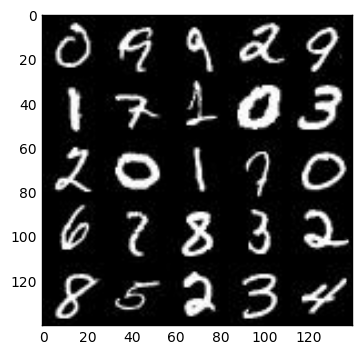

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.1.0


/home/carnd/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:14: UserWarning: No GPU found. Please use a GPU to train your neural network.


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    input_real=tf.placeholder(tf.float32,(None, image_width, image_height, image_channels), name='input_real')
    input_z=tf.placeholder(tf.float32, (None, z_dim), name='input_z')
    learning_rate=tf.placeholder(tf.float32, (None), name='learning_rate')

    return input_real, input_z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [6]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    with tf.variable_scope('discriminator', reuse=reuse):
        #x0=tf.layers.conv2d(images, 32, 5, strides=2, padding='same')
        #relu0=tf.maximum(0.2 * x0, x0)
        
        x1=tf.layers.conv2d(images, 64, 5, strides=2, padding='same')
        #batch_norm1=tf.layers.batch_normalization(x1, training=True)
        relu1=tf.maximum(0.2 * x1, x1)
        
        x2=tf.layers.conv2d(images, 128, 5, strides=2, padding='same')
        batch_norm1=tf.layers.batch_normalization(x2, training=True)
        relu2=tf.maximum(0.2 * batch_norm1, batch_norm1)
        
        x3=tf.layers.conv2d(images, 256, 5, strides=2, padding='same')
        batch_norm2=tf.layers.batch_normalization(x3, training=True)
        relu3=tf.maximum(0.2 * batch_norm2, batch_norm2)
        
        flatten=tf.reshape(relu3,(-1, 4*4*256))
        logits=tf.layers.dense(flatten, 1)
        out=tf.sigmoid(logits)
        
        
        
    return logits, out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [7]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    alpha = 0.2
    # TODO: Implement Function
    with tf.variable_scope('generator', reuse = not is_train):
        
        # First fully connected layer
        x1 = tf.layers.dense(z, 7*7*512)
        # reshaping to start of convolutional stack
        # unflatten layer
        x1 = tf.reshape(x1, (-1, 7, 7, 512))
        x1 = tf.layers.batch_normalization(x1, training = is_train)
        lrelu1 = tf.maximum(alpha * x1, x1)       #leaky relu
        
        # 7X7x128
        x2 = tf.layers.conv2d_transpose(inputs=lrelu1, filters=256, kernel_size=5, strides=1, padding='same')
        x2 = tf.layers.batch_normalization(x2, training = is_train)
        lrelu2 = tf.maximum(alpha * x2, x2)       #leaky relu
        
        # 14x14x64
        x3 = tf.layers.conv2d_transpose(inputs=lrelu2, filters=128, kernel_size=5, strides=1, padding='same')
        x3 = tf.layers.batch_normalization(x3, training = is_train)
        lrelu3 = tf.maximum(alpha * x3, x3)       #leaky relu
        
        x31 = tf.layers.conv2d_transpose(inputs=lrelu2, filters=64, kernel_size=5, strides=2, padding='same')
        x31 = tf.layers.batch_normalization(x31, training = is_train)
        lrelu31 = tf.maximum(alpha * x31, x31)       #leaky relu
        
        # Output layer, 28x28xout_channel_dim
        logits = tf.layers.conv2d_transpose(inputs=lrelu31, filters=out_channel_dim, kernel_size=2, strides=2, padding='same')       
        out = tf.tanh(logits)
        
    return out

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [8]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)

    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake

    return d_loss, g_loss
 


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [9]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
   
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

    return d_train_opt, g_train_opt
    


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [10]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [11]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    input_real, input_z, lr = model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim)
    d_loss, g_loss = model_loss(input_real, input_z, data_shape[3])
    d_opt, g_opt = model_opt(d_loss, g_loss, learning_rate, beta1)
    
    steps = 0
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                batch_images = batch_images.reshape(batch_size, data_shape[1], data_shape[2], data_shape[3])
                batch_images = batch_images* 2
                # TODO: Train Model
                steps += 1
                # Sample random noise for G
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                
                 # Run optimizers
                _ = sess.run(d_opt, feed_dict={input_real : batch_images, input_z : batch_z, lr:learning_rate})
                _ = sess.run(g_opt, feed_dict={input_z : batch_z, input_real: batch_images,lr:learning_rate})
            
                if steps % 10 == 0:
                    # At the end of each 10 epochs, get the losses and print them out
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images, lr:learning_rate})
                    train_loss_g = g_loss.eval({input_z: batch_z, lr:learning_rate})

                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                    
                if steps % 100 == 0:
                    # At the end of each 100 epochs, show generator output
                    show_generator_output(sess, 25, input_z, data_shape[3], data_image_mode)
                
                
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 1.1891... Generator Loss: 0.5883
Epoch 1/2... Discriminator Loss: 1.6201... Generator Loss: 0.3302
Epoch 1/2... Discriminator Loss: 1.4078... Generator Loss: 0.4682
Epoch 1/2... Discriminator Loss: 1.4094... Generator Loss: 0.4944
Epoch 1/2... Discriminator Loss: 1.2550... Generator Loss: 0.5666
Epoch 1/2... Discriminator Loss: 1.3670... Generator Loss: 0.4769
Epoch 1/2... Discriminator Loss: 1.1524... Generator Loss: 0.6074
Epoch 1/2... Discriminator Loss: 1.3202... Generator Loss: 0.5654
Epoch 1/2... Discriminator Loss: 1.3658... Generator Loss: 0.5006
Epoch 1/2... Discriminator Loss: 1.4256... Generator Loss: 0.5089


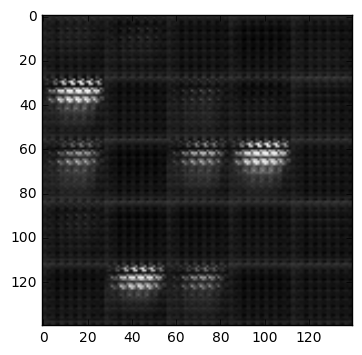

Epoch 1/2... Discriminator Loss: 1.3712... Generator Loss: 0.5299
Epoch 1/2... Discriminator Loss: 1.2607... Generator Loss: 0.5801
Epoch 1/2... Discriminator Loss: 1.2718... Generator Loss: 0.5769
Epoch 1/2... Discriminator Loss: 1.3172... Generator Loss: 0.5919
Epoch 1/2... Discriminator Loss: 1.3830... Generator Loss: 0.5348
Epoch 1/2... Discriminator Loss: 1.3142... Generator Loss: 0.5794
Epoch 1/2... Discriminator Loss: 1.4359... Generator Loss: 0.5282
Epoch 1/2... Discriminator Loss: 1.3707... Generator Loss: 0.5837
Epoch 1/2... Discriminator Loss: 1.3750... Generator Loss: 0.6178
Epoch 1/2... Discriminator Loss: 1.3871... Generator Loss: 0.6316


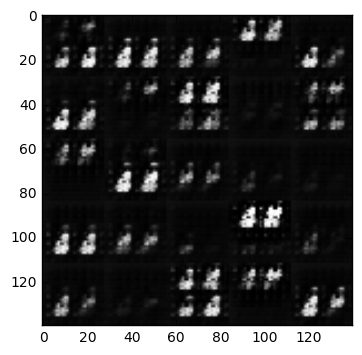

Epoch 1/2... Discriminator Loss: 1.3168... Generator Loss: 0.6252
Epoch 1/2... Discriminator Loss: 1.3370... Generator Loss: 0.6453
Epoch 1/2... Discriminator Loss: 1.3502... Generator Loss: 0.6400
Epoch 1/2... Discriminator Loss: 1.3577... Generator Loss: 0.6278
Epoch 1/2... Discriminator Loss: 1.3557... Generator Loss: 0.6281
Epoch 1/2... Discriminator Loss: 1.3624... Generator Loss: 0.6339
Epoch 1/2... Discriminator Loss: 1.3524... Generator Loss: 0.6364
Epoch 1/2... Discriminator Loss: 1.3788... Generator Loss: 0.6611
Epoch 1/2... Discriminator Loss: 1.3537... Generator Loss: 0.6221
Epoch 1/2... Discriminator Loss: 1.3814... Generator Loss: 0.6702


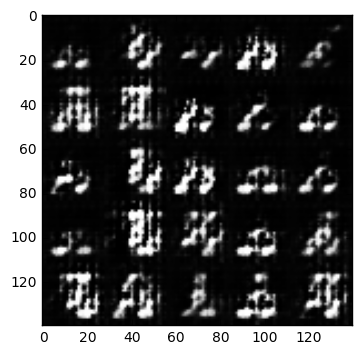

Epoch 1/2... Discriminator Loss: 1.3517... Generator Loss: 0.6351
Epoch 1/2... Discriminator Loss: 1.3837... Generator Loss: 0.6559
Epoch 1/2... Discriminator Loss: 1.3639... Generator Loss: 0.6380
Epoch 1/2... Discriminator Loss: 1.3806... Generator Loss: 0.6570
Epoch 1/2... Discriminator Loss: 1.3729... Generator Loss: 0.6336
Epoch 1/2... Discriminator Loss: 1.3736... Generator Loss: 0.6438
Epoch 1/2... Discriminator Loss: 1.3799... Generator Loss: 0.6463
Epoch 1/2... Discriminator Loss: 1.3789... Generator Loss: 0.6435
Epoch 1/2... Discriminator Loss: 1.3796... Generator Loss: 0.6536
Epoch 1/2... Discriminator Loss: 1.3835... Generator Loss: 0.6449


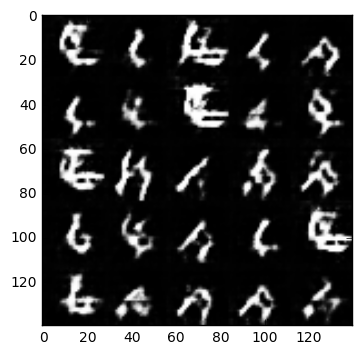

Epoch 1/2... Discriminator Loss: 1.3778... Generator Loss: 0.6432
Epoch 1/2... Discriminator Loss: 1.3786... Generator Loss: 0.6497
Epoch 1/2... Discriminator Loss: 1.3836... Generator Loss: 0.6498
Epoch 1/2... Discriminator Loss: 1.3812... Generator Loss: 0.6580
Epoch 1/2... Discriminator Loss: 1.3798... Generator Loss: 0.6565
Epoch 1/2... Discriminator Loss: 1.3811... Generator Loss: 0.6639
Epoch 2/2... Discriminator Loss: 1.3811... Generator Loss: 0.6564
Epoch 2/2... Discriminator Loss: 1.3838... Generator Loss: 0.6617
Epoch 2/2... Discriminator Loss: 1.3835... Generator Loss: 0.6595
Epoch 2/2... Discriminator Loss: 1.3830... Generator Loss: 0.6588


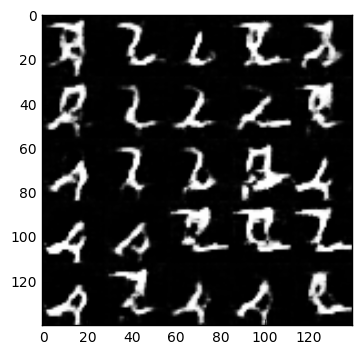

Epoch 2/2... Discriminator Loss: 1.3825... Generator Loss: 0.6617
Epoch 2/2... Discriminator Loss: 1.3813... Generator Loss: 0.6624
Epoch 2/2... Discriminator Loss: 1.3813... Generator Loss: 0.6602
Epoch 2/2... Discriminator Loss: 1.3815... Generator Loss: 0.6590
Epoch 2/2... Discriminator Loss: 1.3856... Generator Loss: 0.6565
Epoch 2/2... Discriminator Loss: 1.3861... Generator Loss: 0.6649
Epoch 2/2... Discriminator Loss: 1.3834... Generator Loss: 0.6629
Epoch 2/2... Discriminator Loss: 1.3839... Generator Loss: 0.6662
Epoch 2/2... Discriminator Loss: 1.3867... Generator Loss: 0.6652
Epoch 2/2... Discriminator Loss: 1.3849... Generator Loss: 0.6696


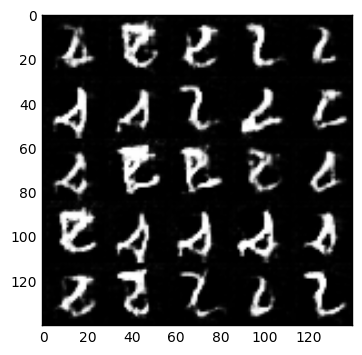

Epoch 2/2... Discriminator Loss: 1.3856... Generator Loss: 0.6650
Epoch 2/2... Discriminator Loss: 1.3841... Generator Loss: 0.6716
Epoch 2/2... Discriminator Loss: 1.3875... Generator Loss: 0.6700
Epoch 2/2... Discriminator Loss: 1.3856... Generator Loss: 0.6731
Epoch 2/2... Discriminator Loss: 1.3864... Generator Loss: 0.6706
Epoch 2/2... Discriminator Loss: 1.3857... Generator Loss: 0.6790
Epoch 2/2... Discriminator Loss: 1.3856... Generator Loss: 0.6706
Epoch 2/2... Discriminator Loss: 1.3844... Generator Loss: 0.6715
Epoch 2/2... Discriminator Loss: 1.3860... Generator Loss: 0.6734
Epoch 2/2... Discriminator Loss: 1.3860... Generator Loss: 0.6725


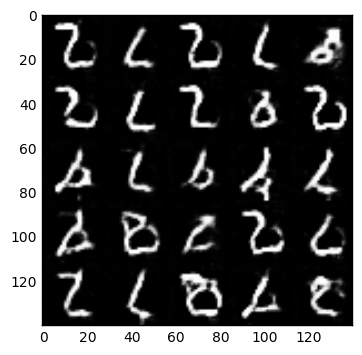

Epoch 2/2... Discriminator Loss: 1.3871... Generator Loss: 0.6697
Epoch 2/2... Discriminator Loss: 1.3848... Generator Loss: 0.6789
Epoch 2/2... Discriminator Loss: 1.3868... Generator Loss: 0.6686
Epoch 2/2... Discriminator Loss: 1.3857... Generator Loss: 0.6779
Epoch 2/2... Discriminator Loss: 1.3864... Generator Loss: 0.6706
Epoch 2/2... Discriminator Loss: 1.3866... Generator Loss: 0.6791
Epoch 2/2... Discriminator Loss: 1.3859... Generator Loss: 0.6731
Epoch 2/2... Discriminator Loss: 1.3857... Generator Loss: 0.6795
Epoch 2/2... Discriminator Loss: 1.3859... Generator Loss: 0.6780
Epoch 2/2... Discriminator Loss: 1.3892... Generator Loss: 0.6689


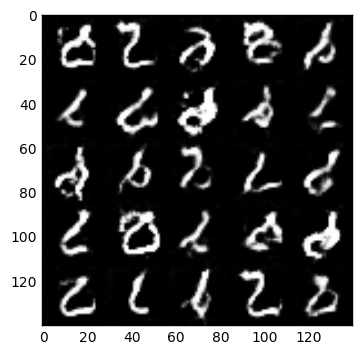

Epoch 2/2... Discriminator Loss: 1.3864... Generator Loss: 0.6797
Epoch 2/2... Discriminator Loss: 1.3853... Generator Loss: 0.6809
Epoch 2/2... Discriminator Loss: 1.3861... Generator Loss: 0.6867
Epoch 2/2... Discriminator Loss: 1.3875... Generator Loss: 0.6746
Epoch 2/2... Discriminator Loss: 1.3857... Generator Loss: 0.6805
Epoch 2/2... Discriminator Loss: 1.3863... Generator Loss: 0.6797
Epoch 2/2... Discriminator Loss: 1.3863... Generator Loss: 0.6785
Epoch 2/2... Discriminator Loss: 1.3858... Generator Loss: 0.6806
Epoch 2/2... Discriminator Loss: 1.3851... Generator Loss: 0.6846
Epoch 2/2... Discriminator Loss: 1.3861... Generator Loss: 0.6793


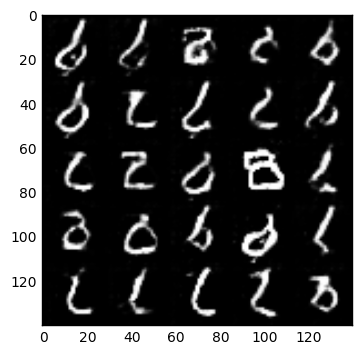

Epoch 2/2... Discriminator Loss: 1.3876... Generator Loss: 0.6703
Epoch 2/2... Discriminator Loss: 1.3874... Generator Loss: 0.6841
Epoch 2/2... Discriminator Loss: 1.3869... Generator Loss: 0.6814


In [12]:
batch_size = 128
z_dim = 100
learning_rate = 0.001
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

#mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.chrome-extension://gfjopfpjmkcfgjpogepmdjmcnihfpokn/img/icons/icon-play_128.pngjpg')))
mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 1.2674... Generator Loss: 0.5635
Epoch 1/1... Discriminator Loss: 1.5134... Generator Loss: 0.3940
Epoch 1/1... Discriminator Loss: 1.5239... Generator Loss: 0.3853
Epoch 1/1... Discriminator Loss: 1.4731... Generator Loss: 0.4307
Epoch 1/1... Discriminator Loss: 1.6360... Generator Loss: 0.3154
Epoch 1/1... Discriminator Loss: 1.4435... Generator Loss: 0.4429
Epoch 1/1... Discriminator Loss: 1.4698... Generator Loss: 0.4118
Epoch 1/1... Discriminator Loss: 1.5037... Generator Loss: 0.3963
Epoch 1/1... Discriminator Loss: 1.5992... Generator Loss: 0.3907
Epoch 1/1... Discriminator Loss: 1.4660... Generator Loss: 0.4114


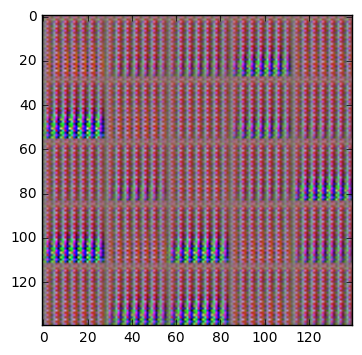

Epoch 1/1... Discriminator Loss: 1.4511... Generator Loss: 0.4212
Epoch 1/1... Discriminator Loss: 1.3032... Generator Loss: 0.6385
Epoch 1/1... Discriminator Loss: 1.2140... Generator Loss: 0.6054
Epoch 1/1... Discriminator Loss: 1.2191... Generator Loss: 0.5706
Epoch 1/1... Discriminator Loss: 1.3397... Generator Loss: 0.5809
Epoch 1/1... Discriminator Loss: 1.3505... Generator Loss: 0.5285
Epoch 1/1... Discriminator Loss: 1.0565... Generator Loss: 0.6704
Epoch 1/1... Discriminator Loss: 1.3383... Generator Loss: 0.4997
Epoch 1/1... Discriminator Loss: 1.4739... Generator Loss: 0.4155
Epoch 1/1... Discriminator Loss: 1.4217... Generator Loss: 0.5434


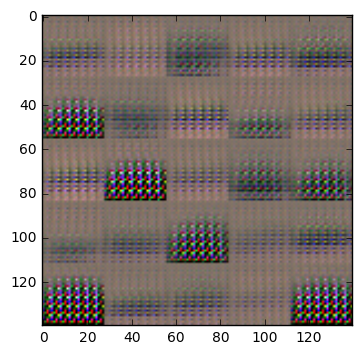

Epoch 1/1... Discriminator Loss: 1.2269... Generator Loss: 0.5991
Epoch 1/1... Discriminator Loss: 1.3341... Generator Loss: 0.5241
Epoch 1/1... Discriminator Loss: 1.2683... Generator Loss: 0.5431
Epoch 1/1... Discriminator Loss: 1.3792... Generator Loss: 0.4742
Epoch 1/1... Discriminator Loss: 1.3748... Generator Loss: 0.4928
Epoch 1/1... Discriminator Loss: 1.4216... Generator Loss: 0.4742
Epoch 1/1... Discriminator Loss: 1.4900... Generator Loss: 0.4082
Epoch 1/1... Discriminator Loss: 1.4860... Generator Loss: 0.4543
Epoch 1/1... Discriminator Loss: 1.4459... Generator Loss: 0.4483
Epoch 1/1... Discriminator Loss: 1.4024... Generator Loss: 0.4657


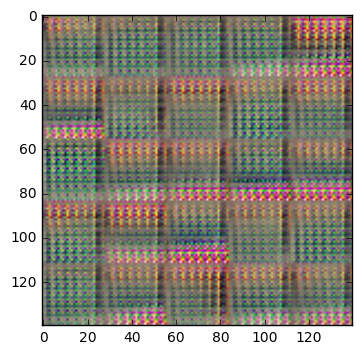

Epoch 1/1... Discriminator Loss: 1.5595... Generator Loss: 0.3600
Epoch 1/1... Discriminator Loss: 1.3040... Generator Loss: 0.5320
Epoch 1/1... Discriminator Loss: 1.5750... Generator Loss: 0.3919
Epoch 1/1... Discriminator Loss: 1.3266... Generator Loss: 0.5087
Epoch 1/1... Discriminator Loss: 1.3551... Generator Loss: 0.4884
Epoch 1/1... Discriminator Loss: 1.4099... Generator Loss: 0.4581
Epoch 1/1... Discriminator Loss: 1.3516... Generator Loss: 0.4985
Epoch 1/1... Discriminator Loss: 1.4699... Generator Loss: 0.4148
Epoch 1/1... Discriminator Loss: 1.5988... Generator Loss: 0.3356
Epoch 1/1... Discriminator Loss: 1.2459... Generator Loss: 0.6209


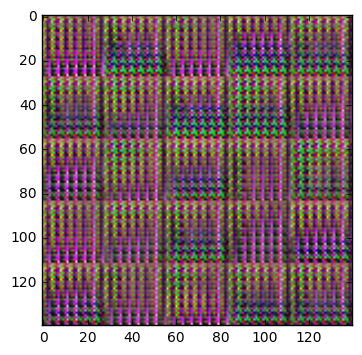

Epoch 1/1... Discriminator Loss: 1.0903... Generator Loss: 0.6435
Epoch 1/1... Discriminator Loss: 1.3407... Generator Loss: 0.4943
Epoch 1/1... Discriminator Loss: 1.5078... Generator Loss: 0.3861
Epoch 1/1... Discriminator Loss: 1.2865... Generator Loss: 0.5289
Epoch 1/1... Discriminator Loss: 1.4152... Generator Loss: 0.4562
Epoch 1/1... Discriminator Loss: 1.5122... Generator Loss: 0.3890
Epoch 1/1... Discriminator Loss: 1.4212... Generator Loss: 0.4471
Epoch 1/1... Discriminator Loss: 1.4096... Generator Loss: 0.4504
Epoch 1/1... Discriminator Loss: 1.5425... Generator Loss: 0.3735
Epoch 1/1... Discriminator Loss: 1.4961... Generator Loss: 0.4033


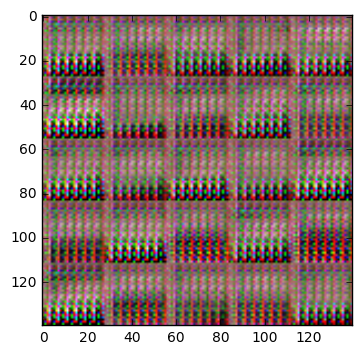

Epoch 1/1... Discriminator Loss: 1.4912... Generator Loss: 0.3985
Epoch 1/1... Discriminator Loss: 1.5675... Generator Loss: 0.3543
Epoch 1/1... Discriminator Loss: 1.4436... Generator Loss: 0.4265
Epoch 1/1... Discriminator Loss: 1.4723... Generator Loss: 0.4125
Epoch 1/1... Discriminator Loss: 1.5162... Generator Loss: 0.4514
Epoch 1/1... Discriminator Loss: 1.4287... Generator Loss: 0.4390
Epoch 1/1... Discriminator Loss: 1.3092... Generator Loss: 0.5301
Epoch 1/1... Discriminator Loss: 1.2398... Generator Loss: 0.6508
Epoch 1/1... Discriminator Loss: 1.3725... Generator Loss: 0.4880
Epoch 1/1... Discriminator Loss: 1.2579... Generator Loss: 0.5455


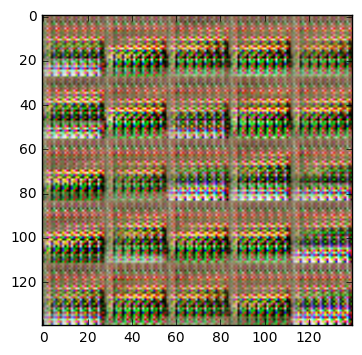

Epoch 1/1... Discriminator Loss: 1.2018... Generator Loss: 0.5926
Epoch 1/1... Discriminator Loss: 1.2839... Generator Loss: 0.5385
Epoch 1/1... Discriminator Loss: 1.2674... Generator Loss: 0.5463
Epoch 1/1... Discriminator Loss: 1.2142... Generator Loss: 0.6150
Epoch 1/1... Discriminator Loss: 1.2418... Generator Loss: 0.6281
Epoch 1/1... Discriminator Loss: 1.2030... Generator Loss: 0.6345
Epoch 1/1... Discriminator Loss: 1.2782... Generator Loss: 0.5930
Epoch 1/1... Discriminator Loss: 1.3376... Generator Loss: 0.5936
Epoch 1/1... Discriminator Loss: 1.3428... Generator Loss: 0.6538
Epoch 1/1... Discriminator Loss: 1.3209... Generator Loss: 0.6704


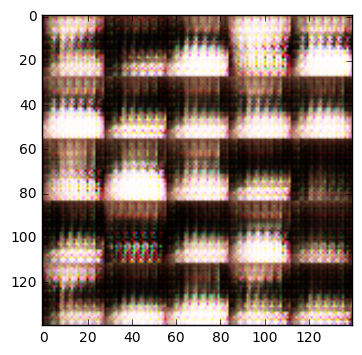

Epoch 1/1... Discriminator Loss: 1.3152... Generator Loss: 0.6617
Epoch 1/1... Discriminator Loss: 1.3182... Generator Loss: 0.6616
Epoch 1/1... Discriminator Loss: 1.3218... Generator Loss: 0.6502
Epoch 1/1... Discriminator Loss: 1.3566... Generator Loss: 0.6180
Epoch 1/1... Discriminator Loss: 1.2987... Generator Loss: 0.6551
Epoch 1/1... Discriminator Loss: 1.3615... Generator Loss: 0.6445
Epoch 1/1... Discriminator Loss: 1.3545... Generator Loss: 0.6290
Epoch 1/1... Discriminator Loss: 1.3246... Generator Loss: 0.6558
Epoch 1/1... Discriminator Loss: 1.3835... Generator Loss: 0.6045
Epoch 1/1... Discriminator Loss: 1.3748... Generator Loss: 0.6381


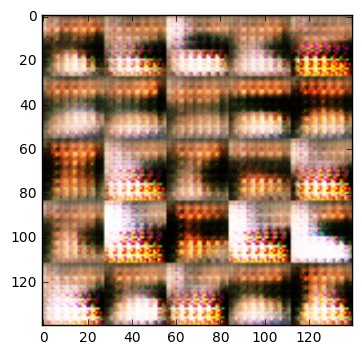

Epoch 1/1... Discriminator Loss: 1.3379... Generator Loss: 0.6483
Epoch 1/1... Discriminator Loss: 1.3431... Generator Loss: 0.6485
Epoch 1/1... Discriminator Loss: 1.3744... Generator Loss: 0.6789
Epoch 1/1... Discriminator Loss: 1.3721... Generator Loss: 0.6800
Epoch 1/1... Discriminator Loss: 1.3732... Generator Loss: 0.6533
Epoch 1/1... Discriminator Loss: 1.3669... Generator Loss: 0.6460
Epoch 1/1... Discriminator Loss: 1.3672... Generator Loss: 0.6472
Epoch 1/1... Discriminator Loss: 1.3702... Generator Loss: 0.6511
Epoch 1/1... Discriminator Loss: 1.3608... Generator Loss: 0.6438
Epoch 1/1... Discriminator Loss: 1.3779... Generator Loss: 0.6282


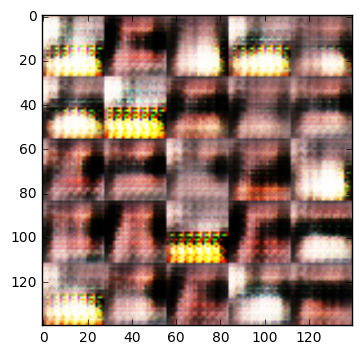

Epoch 1/1... Discriminator Loss: 1.3675... Generator Loss: 0.6368
Epoch 1/1... Discriminator Loss: 1.3700... Generator Loss: 0.6526
Epoch 1/1... Discriminator Loss: 1.3723... Generator Loss: 0.6718
Epoch 1/1... Discriminator Loss: 1.3786... Generator Loss: 0.6537
Epoch 1/1... Discriminator Loss: 1.3729... Generator Loss: 0.6542
Epoch 1/1... Discriminator Loss: 1.3749... Generator Loss: 0.6579
Epoch 1/1... Discriminator Loss: 1.3766... Generator Loss: 0.6457
Epoch 1/1... Discriminator Loss: 1.3757... Generator Loss: 0.6548
Epoch 1/1... Discriminator Loss: 1.3728... Generator Loss: 0.6505
Epoch 1/1... Discriminator Loss: 1.3896... Generator Loss: 0.6243


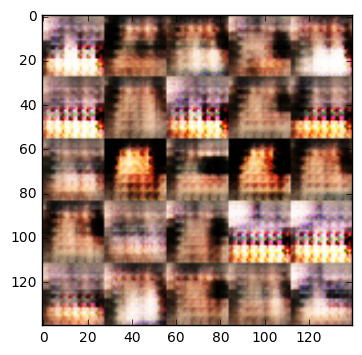

Epoch 1/1... Discriminator Loss: 1.4078... Generator Loss: 0.6257
Epoch 1/1... Discriminator Loss: 1.3799... Generator Loss: 0.6701
Epoch 1/1... Discriminator Loss: 1.3728... Generator Loss: 0.6687
Epoch 1/1... Discriminator Loss: 1.3756... Generator Loss: 0.6639
Epoch 1/1... Discriminator Loss: 1.3837... Generator Loss: 0.6613
Epoch 1/1... Discriminator Loss: 1.3777... Generator Loss: 0.6600
Epoch 1/1... Discriminator Loss: 1.3852... Generator Loss: 0.6801
Epoch 1/1... Discriminator Loss: 1.3800... Generator Loss: 0.6752
Epoch 1/1... Discriminator Loss: 1.3877... Generator Loss: 0.6722
Epoch 1/1... Discriminator Loss: 1.3862... Generator Loss: 0.6813


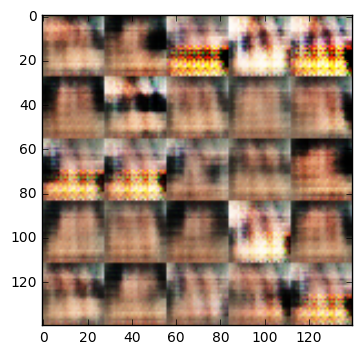

Epoch 1/1... Discriminator Loss: 1.3858... Generator Loss: 0.6830
Epoch 1/1... Discriminator Loss: 1.3841... Generator Loss: 0.6791
Epoch 1/1... Discriminator Loss: 1.3820... Generator Loss: 0.6796
Epoch 1/1... Discriminator Loss: 1.3855... Generator Loss: 0.6870
Epoch 1/1... Discriminator Loss: 1.3842... Generator Loss: 0.6842
Epoch 1/1... Discriminator Loss: 1.3833... Generator Loss: 0.6831
Epoch 1/1... Discriminator Loss: 1.3862... Generator Loss: 0.6829
Epoch 1/1... Discriminator Loss: 1.3848... Generator Loss: 0.6889
Epoch 1/1... Discriminator Loss: 1.3868... Generator Loss: 0.6873
Epoch 1/1... Discriminator Loss: 1.3860... Generator Loss: 0.6874


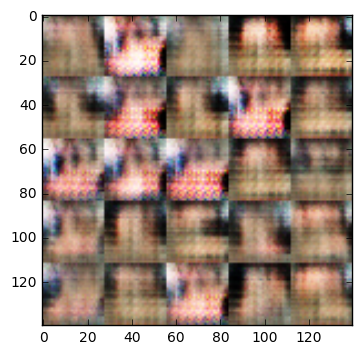

Epoch 1/1... Discriminator Loss: 1.3868... Generator Loss: 0.6906
Epoch 1/1... Discriminator Loss: 1.3862... Generator Loss: 0.6916
Epoch 1/1... Discriminator Loss: 1.3867... Generator Loss: 0.6913
Epoch 1/1... Discriminator Loss: 1.3855... Generator Loss: 0.6890
Epoch 1/1... Discriminator Loss: 1.3868... Generator Loss: 0.6909
Epoch 1/1... Discriminator Loss: 1.3871... Generator Loss: 0.6905
Epoch 1/1... Discriminator Loss: 1.3865... Generator Loss: 0.6919
Epoch 1/1... Discriminator Loss: 1.3867... Generator Loss: 0.6918
Epoch 1/1... Discriminator Loss: 1.3867... Generator Loss: 0.6921
Epoch 1/1... Discriminator Loss: 1.3865... Generator Loss: 0.6923


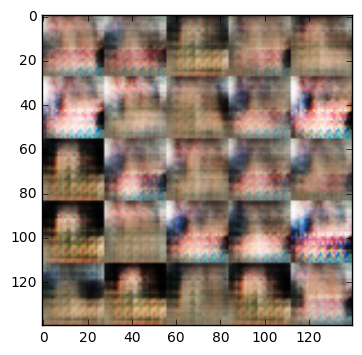

Epoch 1/1... Discriminator Loss: 1.3864... Generator Loss: 0.6923
Epoch 1/1... Discriminator Loss: 1.3863... Generator Loss: 0.6920
Epoch 1/1... Discriminator Loss: 1.3866... Generator Loss: 0.6916
Epoch 1/1... Discriminator Loss: 1.3854... Generator Loss: 0.6914
Epoch 1/1... Discriminator Loss: 1.3860... Generator Loss: 0.6909
Epoch 1/1... Discriminator Loss: 1.3859... Generator Loss: 0.6925
Epoch 1/1... Discriminator Loss: 1.3862... Generator Loss: 0.6927
Epoch 1/1... Discriminator Loss: 1.3862... Generator Loss: 0.6928
Epoch 1/1... Discriminator Loss: 1.3864... Generator Loss: 0.6927
Epoch 1/1... Discriminator Loss: 1.3863... Generator Loss: 0.6926


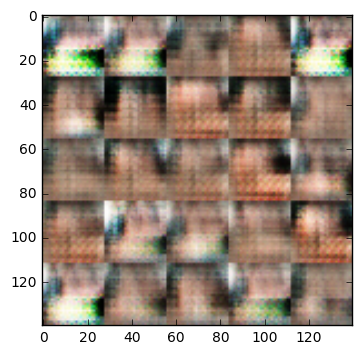

Epoch 1/1... Discriminator Loss: 1.3864... Generator Loss: 0.6927
Epoch 1/1... Discriminator Loss: 1.3864... Generator Loss: 0.6927
Epoch 1/1... Discriminator Loss: 1.3864... Generator Loss: 0.6926
Epoch 1/1... Discriminator Loss: 1.3860... Generator Loss: 0.6922
Epoch 1/1... Discriminator Loss: 1.3864... Generator Loss: 0.6929
Epoch 1/1... Discriminator Loss: 1.3864... Generator Loss: 0.6929
Epoch 1/1... Discriminator Loss: 1.3864... Generator Loss: 0.6929
Epoch 1/1... Discriminator Loss: 1.3864... Generator Loss: 0.6929
Epoch 1/1... Discriminator Loss: 1.3864... Generator Loss: 0.6929
Epoch 1/1... Discriminator Loss: 1.3862... Generator Loss: 0.6928


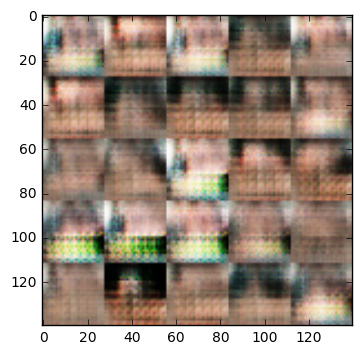

Epoch 1/1... Discriminator Loss: 1.3860... Generator Loss: 0.6908
Epoch 1/1... Discriminator Loss: 1.3864... Generator Loss: 0.6928
Epoch 1/1... Discriminator Loss: 1.3863... Generator Loss: 0.6924
Epoch 1/1... Discriminator Loss: 1.3863... Generator Loss: 0.6927
Epoch 1/1... Discriminator Loss: 1.3864... Generator Loss: 0.6926
Epoch 1/1... Discriminator Loss: 1.3864... Generator Loss: 0.6926
Epoch 1/1... Discriminator Loss: 1.3863... Generator Loss: 0.6927
Epoch 1/1... Discriminator Loss: 1.3863... Generator Loss: 0.6927


In [13]:
batch_size = 128
z_dim = 100
learning_rate = 0.001
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.